In [ ]:
import torch
import matplotlib.pyplot as plt

#Prob 1

In [ ]:
# Given data
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_un = 0.1 * t_u  # Normalize the input data

def model(t_u, params):
    w2, w1, b = params
    return w2 * t_u**2 + w1 * t_u + b

def linear_model(t_u, params):
    w, b = params
    return w * t_u + b

def loss_fn(t_p, t_c):
    """Mean squared error loss function."""
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, learning_rate, params, t_u, t_c, optimizer, model_fn):
    for epoch in range(1, n_epochs + 1):
        t_p = model_fn(t_u, params)  # Adjusted to pass params as a single argument
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(params, clip_value=1.0)
        optimizer.step()

        if epoch % 500 == 0 or epoch == 1:
            print(f"Epoch {epoch}, Loss {loss.item()}")

    return params

def initialize_params(model_type='non-linear'):
    """Initializes parameters with default values."""
    if model_type == 'non-linear':
        return (torch.ones((), requires_grad=True),
                torch.ones((), requires_grad=True),
                torch.zeros((), requires_grad=True))
    elif model_type == 'linear':
        return (torch.ones((), requires_grad=True),
                torch.zeros((), requires_grad=True))

# Train non-linear and linear models
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_loss = float('inf')
best_params, best_lr, best_optimizer = None, None, None

for lr in learning_rates:
    for optimizer_class, model_fn in [(torch.optim.SGD, model), (torch.optim.Adam, model)]:
        optimizer_name = optimizer_class.__name__
        params = initialize_params('non-linear')
        optimizer = optimizer_class(params, lr=lr)
        trained_params = training_loop(5000, lr, params, t_un, t_c, optimizer, model_fn)
        final_loss = loss_fn(model_fn(t_un, trained_params), t_c).item()

        if final_loss < best_loss:
            best_loss, best_params, best_lr, best_optimizer = final_loss, trained_params, lr, optimizer_name

        print(f"Finished training with {optimizer_name} and learning rate {lr}: Final Loss {final_loss}")

# Train linear model with best found learning rate
params_linear = initialize_params('linear')
optimizer_linear = torch.optim.SGD(params_linear, lr=best_lr)
trained_params_linear = training_loop(5000, best_lr, params_linear, t_un, t_c, optimizer_linear, linear_model)
w_linear_value, b_linear_value = trained_params_linear
print(f'Trained linear model parameters: w = {w_linear_value.item()}, b = {b_linear_value.item()}')


Epoch 1, Loss 675.7943725585938
Epoch 500, Loss 13.10329818725586
Epoch 1000, Loss 13.10329818725586
Epoch 1500, Loss 13.10329818725586
Epoch 2000, Loss 13.10329818725586
Epoch 2500, Loss 13.10329818725586
Epoch 3000, Loss 13.10329818725586
Epoch 3500, Loss 13.10329818725586
Epoch 4000, Loss 13.10329818725586
Epoch 4500, Loss 13.10329818725586
Epoch 5000, Loss 13.10329818725586
Finished training with SGD and learning rate 0.1: Final Loss 11.714712142944336
Epoch 1, Loss 675.7943725585938
Epoch 500, Loss 3.0134942531585693
Epoch 1000, Loss 3.0136632919311523
Epoch 1500, Loss 3.0137360095977783
Epoch 2000, Loss 3.0137712955474854
Epoch 2500, Loss 3.0137970447540283
Epoch 3000, Loss 3.0138330459594727
Epoch 3500, Loss 3.0138418674468994
Epoch 4000, Loss 3.013850450515747
Epoch 4500, Loss 3.013857364654541
Epoch 5000, Loss 3.0138580799102783
Finished training with Adam and learning rate 0.1: Final Loss 3.105898857116699
Epoch 1, Loss 675.7943725585938
Epoch 500, Loss 3.0616912841796875
Epo

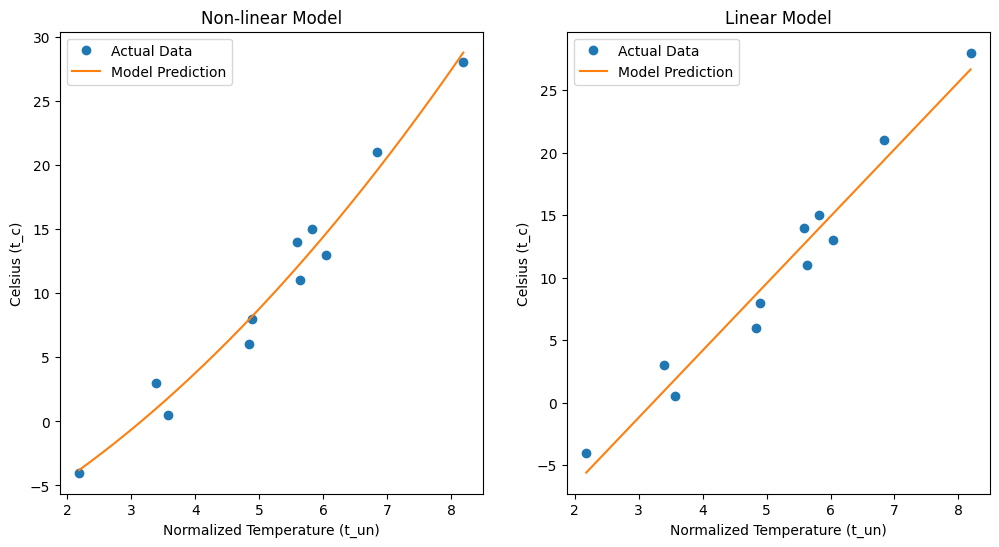

In [ ]:
# Function to generate predictions using the non-linear model
def non_linear_model_predictions(t_u, params):
    w2, w1, b = params
    return w2 * t_u**2 + w1 * t_u + b

# Function to generate predictions using the linear model
def linear_model_predictions(t_u, params):
    w, b = params
    return w * t_u + b

# Generate predictions
t_un_grid = torch.linspace(min(t_un), max(t_un), 1000)  # A grid of normalized temperature values
non_linear_preds = non_linear_model_predictions(t_un_grid, best_params)
linear_preds = linear_model_predictions(t_un_grid, (w_linear_value, b_linear_value))

# Plotting
plt.figure(figsize=(12, 6))

# Plot for the non-linear model
plt.subplot(1, 2, 1)
plt.title('Non-linear Model')
plt.plot(t_un.numpy(), t_c.numpy(), 'o', label='Actual Data')
plt.plot(t_un_grid.numpy(), non_linear_preds.detach().numpy(), label='Model Prediction')
plt.xlabel('Normalized Temperature (t_un)')
plt.ylabel('Celsius (t_c)')
plt.legend()

# Plot for the linear model
plt.subplot(1, 2, 2)
plt.title('Linear Model')
plt.plot(t_un.numpy(), t_c.numpy(), 'o', label='Actual Data')
plt.plot(t_un_grid.numpy(), linear_preds.detach().numpy(), label='Model Prediction')
plt.xlabel('Normalized Temperature (t_un)')
plt.ylabel('Celsius (t_c)')
plt.legend()

plt.show()


# Prob 2

get data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/IntroML/content/Housing.csv'
housing_data = pd.read_csv(file_path)
display(housing_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Selecting relevant features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = housing_data[features]
y = housing_data['price']

In [ ]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the model using SGD
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
sgd_regressor.fit(X_train, y_train)

# Predicting and evaluating with SGD
y_pred_sgd = sgd_regressor.predict(X_val)
mse_sgd = mean_squared_error(y_val, y_pred_sgd)

In [ ]:
# Training the model using ADAM
adam_regressor = MLPRegressor(solver='adam', max_iter=10000, random_state=0)
adam_regressor.fit(X_train, y_train)

# Predicting and evaluating with ADAM
y_pred_adam = adam_regressor.predict(X_val)
mse_adam = mean_squared_error(y_val, y_pred_adam)

In [ ]:
# Output the MSE for both models
print("MSE with SGD:", mse_sgd)
print("MSE with ADAM:", mse_adam)

MSE with SGD: 4.2094506191439835e+32
MSE with ADAM: 3085782674968.5786


part 2.b

In [ ]:

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# SGD Regressor Training
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
sgd_results = {lr: {'training_loss': [], 'validation_loss': []} for lr in learning_rates}

for lr in learning_rates:
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=0)
    for epoch in range(5000):
        sgd_regressor.partial_fit(X_train_scaled, y_train)
        if (epoch + 1) % 500 == 0:
            train_loss = mean_squared_error(y_train, sgd_regressor.predict(X_train_scaled))
            val_loss = mean_squared_error(y_val, sgd_regressor.predict(X_val_scaled))
            sgd_results[lr]['training_loss'].append(train_loss)
            sgd_results[lr]['validation_loss'].append(val_loss)

# ADAM Regressor Training (Using MLPRegressor as an approximation)
adam_results = {lr: {'training_loss': [], 'validation_loss': []} for lr in learning_rates}

for lr in learning_rates:
    adam_regressor = MLPRegressor(hidden_layer_sizes=(), solver='adam', learning_rate_init=lr, max_iter=1, random_state=0)
    for epoch in range(5000):
        adam_regressor.partial_fit(X_train_scaled, y_train)
        if (epoch + 1) % 500 == 0:
            train_loss = mean_squared_error(y_train, adam_regressor.predict(X_train_scaled))
            val_loss = mean_squared_error(y_val, adam_regressor.predict(X_val_scaled))
            adam_results[lr]['training_loss'].append(train_loss)
            adam_results[lr]['validation_loss'].append(val_loss)

# Output results
print("SGD Results:", sgd_results)
print("ADAM Results:", adam_results)

# Function to print results vertically
def print_results(title, results):
    print(title)
    for lr, metrics in results.items():
        print(f"\nLearning Rate: {lr}")
        for epoch in range(len(metrics['training_loss'])):
            print(f"Epoch {500 * (epoch + 1)}: "
                  f"Training Loss = {metrics['training_loss'][epoch]}, "
                  f"Validation Loss = {metrics['validation_loss'][epoch]}")

# Output SGD and ADAM results
print_results("SGD Results", sgd_results)
print("\n--------------------------------------\n")
print_results("ADAM Results", adam_results)

SGD Results: {0.1: {'training_loss': [1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494, 1903322341603.8494], 'validation_loss': [1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872, 1426534645940.8872]}, 0.01: {'training_loss': [1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113, 1648080040333.113], 'validation_loss': [1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958, 1160922392185.9958]}, 0.001: {'training_loss': [1626626075992.6313, 1626626075992.6313, 1626626075992.6313, 1626626075992.6

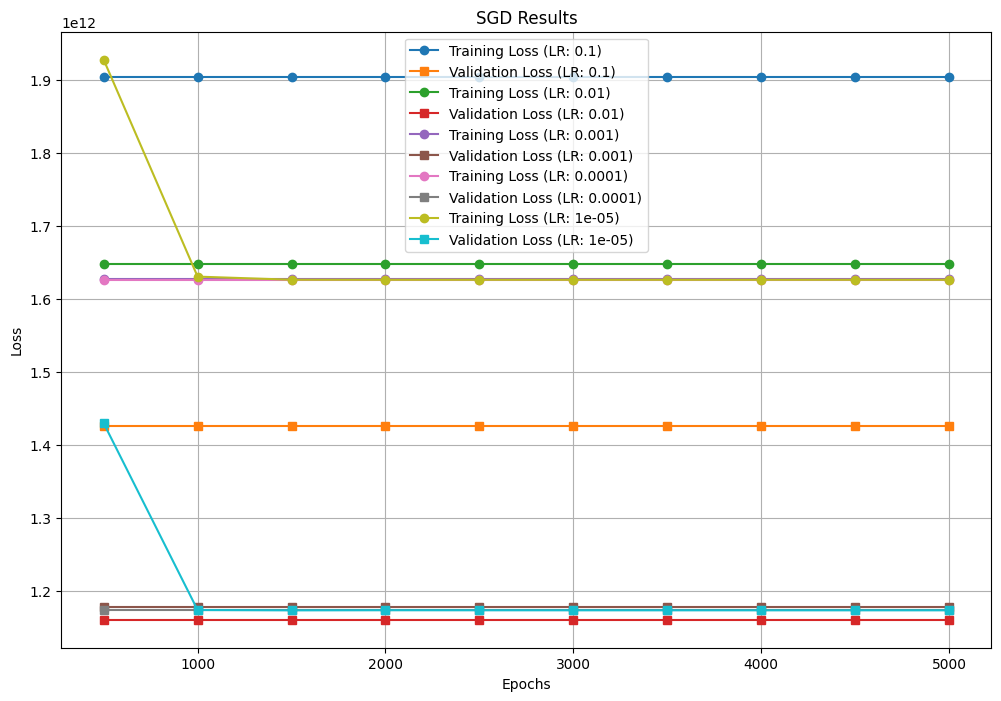

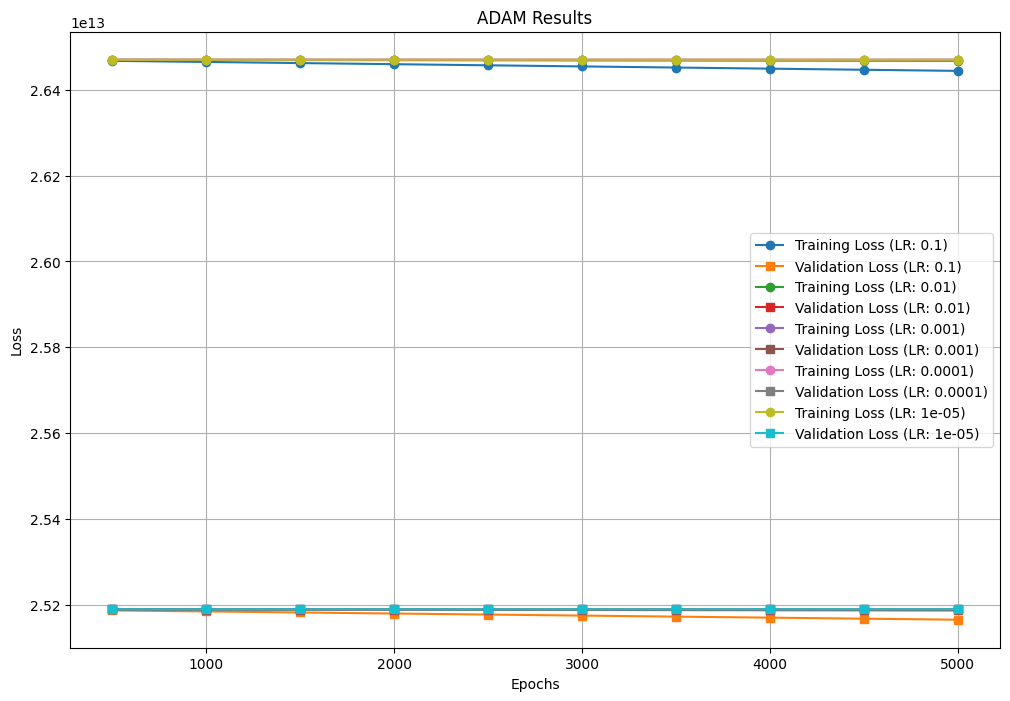

In [ ]:
# Function to plot the results
def plot_results(title, results):
    plt.figure(figsize=(12, 8))
    for lr, metrics in results.items():
        epochs = range(500, 5001, 500)
        plt.plot(epochs, metrics['training_loss'], marker='o', label=f'Training Loss (LR: {lr})')
        plt.plot(epochs, metrics['validation_loss'], marker='s', label=f'Validation Loss (LR: {lr})')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot SGD and ADAM results
plot_results("SGD Results", sgd_results)
plot_results("ADAM Results", adam_results)

#prob 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

file_path = '/content/drive/My Drive/IntroML/content/Housing.csv'
housing_data = pd.read_csv(file_path)
display(housing_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Selecting target variable
y = housing_data['price'].values

# Preprocessing non-numeric features using OneHotEncoder
numeric_features = housing_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = housing_data.select_dtypes(include=['object']).columns

# If 'price' is a categorical feature, remove it from the list
if 'price' in categorical_features:
    categorical_features = categorical_features.drop('price')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
# Transforming the data
X = preprocessor.fit_transform(housing_data)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Different learning rates to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Dictionary to store results
results = {lr: {'training_loss': [], 'validation_accuracy': []} for lr in learning_rates}

# Training models with different learning rates
for lr in learning_rates:
    sgd = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=0)
    for epoch in range(1, 5001):
        sgd.partial_fit(X_train, y_train)  # One epoch of training
        if epoch % 500 == 0:
            train_loss = mean_squared_error(y_train, sgd.predict(X_train))
            val_accuracy = mean_squared_error(y_val, sgd.predict(X_val))
            results[lr]['training_loss'].append(train_loss)
            results[lr]['validation_accuracy'].append(val_accuracy)

# Identifying the best learning rate based on validation accuracy
best_lr = min(results, key=lambda lr: min(results[lr]['validation_accuracy']))
best_performance = results[best_lr]

print("Best Learning Rate:", best_lr)
print("Training Loss at every 500 epochs:", best_performance['training_loss'])
print("Validation Accuracy at every 500 epochs:", best_performance['validation_accuracy'])

Best Learning Rate: 0.01
Training Loss at every 500 epochs: [111130.91229667036, 107188.04423389526, 103746.09485363509, 100751.06329427878, 98154.41404083854, 95912.5392934048, 93986.27350483107, 92340.45505925182, 90943.53054361421, 89767.19750886598]
Validation Accuracy at every 500 epochs: [109572.38090212777, 102001.51535206537, 95388.75310542947, 89630.94501959124, 84635.3755171992, 80318.73650710713, 76606.20085324817, 73430.58580403973, 70731.59770175836, 68455.15014158678]
